In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

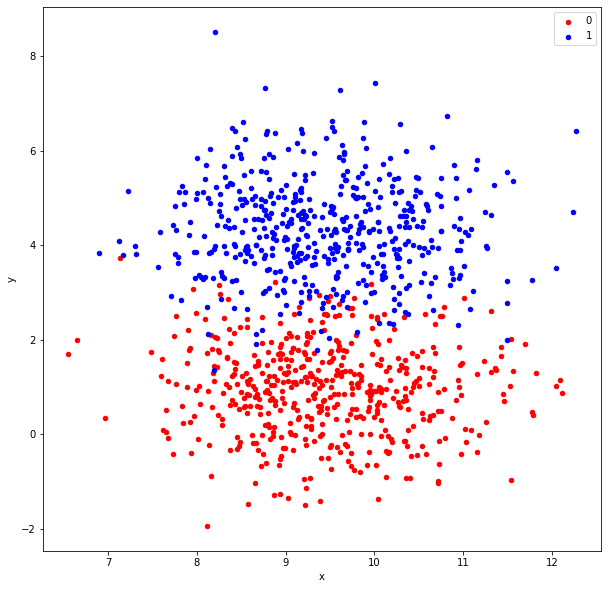

In [81]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state = 4)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

fig, ax = plt.subplots(figsize = (10,10))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = colors[key])
plt.show()

In [82]:
class NaiveBayes:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.classes = self.y.unique()
        self.features = self.x.columns

    def gaussian_dist(self, x, mean, std):
        
        pdf = (1/(std*np.sqrt(2*np.pi))) * (np.exp(-0.5*((x - mean)/std)**2))
        
        return pdf
    
    def train(self):
        
        self.means = {}
        self.stds = {}
        self.priors = {}
        for cls in self.classes:
            self.priors[cls] = len(self.y[self.y == cls])/len(self.y)
            for feature in self.features:
                self.means[(feature, cls)] = self.x[self.y == cls][feature].mean()
                self.stds[(feature, cls)] = self.x[self.y == cls][feature].std()
     
    def predict(self, x):
        
        pred = {}
        for cls in self.classes:
            prior = self.priors[cls]
            pred[cls] = np.log(prior)
            for feature in self.features:
                mean = self.means[(feature, cls)]
                std = self.stds[(feature, cls)]
                pred[cls] = pred[cls] + np.log(self.gaussian_dist(x[feature], mean, std))
        
        return max(pred, key = pred.get)
                
    def plot_decision_boundary(self):
        
        min1, max1 = self.x.iloc[:,0].min() - 1, self.x.iloc[:,0].max() + 1
        min2, max2 = self.x.iloc[:,1].min() - 1, self.x.iloc[:,1].max() + 1
        x1grid = np.arange(min1, max1, 0.1)
        x2grid = np.arange(min2, max2, 0.1)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1,r2))
        grid = pd.DataFrame(grid, columns = self.x.columns)
        
        yhat = [self.predict(row) for _, row in grid.iterrows()]
        
        zz = np.array(yhat).reshape(xx.shape)
        plt.figure(figsize=(10,10))
        plt.contourf(xx, yy, zz, cmap = 'Paired')
        #colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
        for cls in self.classes:
            idx = self.y[self.y == cls].index
            plt.scatter(self.x.iloc[idx, 0], self.x.iloc[idx, 1], cmap = 'Paired')

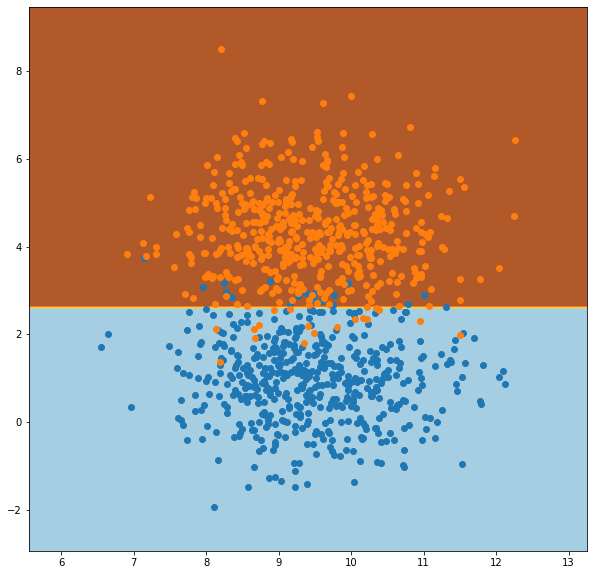

In [83]:
nb = NaiveBayes(df[['x','y']], df['label'])
nb.train()
nb.plot_decision_boundary()